In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
from plot_utils import plt2D

In [2]:
path = "../data/am4/"
year = '201001-201412'
exp = 'c96L33_am4p0_qadt_cosp_2010'
hemisphere = 'nh'

f = xr.open_dataset(path + hemisphere + '_' + year + "_monthly_transact_" + exp +".nc").load()
f.close()

f = f.sel(distance = slice(-6.5, 6.5))
f = f.groupby("time.season").mean()

myfontsize = 12

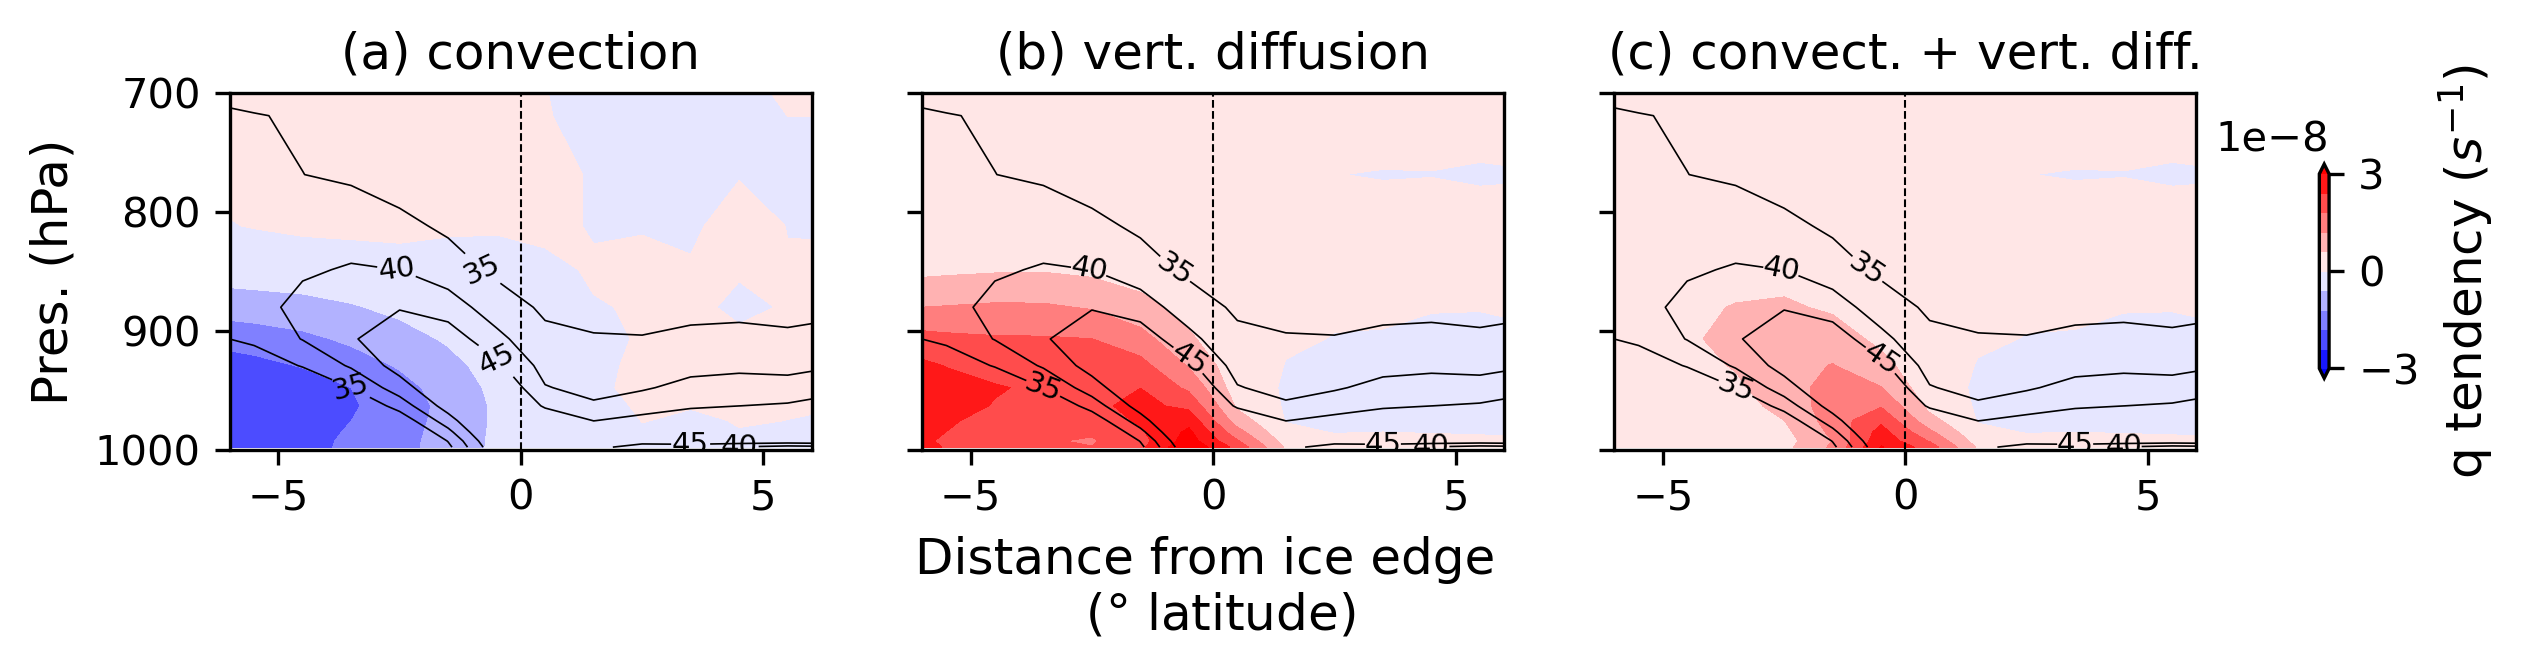

In [3]:
myfontsize = 12
fig, axs = plt.subplots(ncols = 3,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(23/2.54, 4.5/2.54), dpi = 300)

plt.tight_layout()

ff0 = f.isel(season = 0)
lim = 3.*(10.**-8)
ncl = 10

#--------------First col-----------------------------------------------------------
x = ff0.distance.values
y = ff0.level.values
y1 = y
cld_amt = 100.*ff0.cld_amt.values


#1
var = ff0.qdt_conv
plt2D(fig, axs[0], x, y, var, z1 = cld_amt, title = '(a) convection', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, cmap=cm.bwr)

#2
var = ff0.qdt_vdif 
plt2D(fig, axs[1], x, y, var, z1 = cld_amt, title = '(b) vert. diffusion', levels=np.linspace(-lim, lim, ncl + 1),
     xlabel = True, cbar = False, cmap=cm.bwr)

#3
var = ff0.qdt_conv + ff0.qdt_vdif
oax = plt2D(fig, axs[2], x, y, var, z1 = cld_amt, title = '(c) convect. + vert. diff.', levels=np.linspace(-lim, lim, ncl + 1),
            cbar = False, cmap=cm.bwr)


cbar = fig.colorbar(oax, ax = axs, orientation='vertical', shrink=0.6, pad = 0.05,ticks = [-lim, 0, lim])
cbar.set_label('q tendency ($s^{-1}$)', fontsize=myfontsize)

fig.savefig('Fig9_qdt.png', dpi=fig.dpi, bbox_inches='tight')